# UFCFVQ-15-M Programming for Data Science (Autumn 2023)

## Student Name: Masoud

# Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data from (task2a.csv) and (task2b.csv) 
data_a = pd.read_csv('task2a.csv')
data_b = pd.read_csv('task2b.csv')

# Merge the two datasets 
merged_data = pd.merge(data_a, data_b, on=['Entity', 'Year'])

# Print merged data
print (merged_data)


           Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0     Afghanistan  1990           0.160560              0.697779   
1     Afghanistan  1991           0.160312              0.697961   
2     Afghanistan  1992           0.160135              0.698107   
3     Afghanistan  1993           0.160037              0.698257   
4     Afghanistan  1994           0.160022              0.698469   
...           ...   ...                ...                   ...   
6463     Zimbabwe  2013           0.155670              0.607993   
6464     Zimbabwe  2014           0.155993              0.608610   
6465     Zimbabwe  2015           0.156465              0.609363   
6466     Zimbabwe  2016           0.157111              0.610234   
6467     Zimbabwe  2017           0.157963              0.611242   

      Eating disorders (%)  Anxiety disorders (%)  Depression (%)  \
0                 0.101855               4.828830        4.071831   
1                 0.099313               4.82

### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend

First three rows of the dataset:
        Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0  Afghanistan  1990           0.160560              0.697779   
1  Afghanistan  1991           0.160312              0.697961   
2  Afghanistan  1992           0.160135              0.698107   

   Eating disorders (%)  Anxiety disorders (%)  Depression (%)  \
0              0.101855               4.828830        4.071831   
1              0.099313               4.829740        4.079531   
2              0.096692               4.831108        4.088358   

   Drug use disorders (%)  Alcohol use disorders (%)  
0                1.677082                   0.672404  
1                1.684746                   0.671768  
2                1.694334                   0.670644  

Summary of the dataset:
              Year  Schizophrenia (%)  Bipolar disorder (%)  \
count  6468.000000        6468.000000           6468.000000   
mean   2003.500000           0.211644              0.719145   
std    

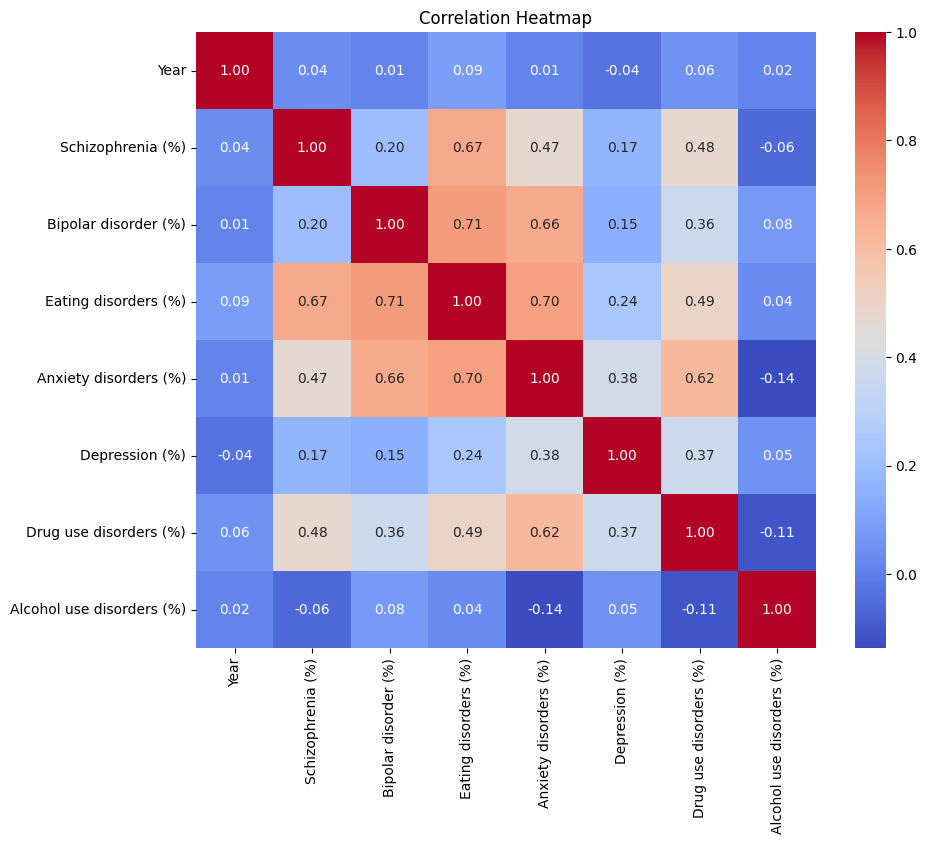

In [2]:
# Visualize the first three rows of the dataset
print("First three rows of the dataset:")
print(merged_data.head(3))

# Summary of the dataset
print("\nSummary of the dataset:")
print(merged_data.describe())

# Numeric by selecting only numeric columns
numeric_dataset = merged_data.select_dtypes(include=['int64', 'float64'])

# Fill missing values, dataset.fillna(dataset.mean(), inplace=True)
numeric_dataset.dropna(inplace=True)

# Correlation matrix
correlation_matrix = numeric_dataset.corr()

# Correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Initially, the code displays the first three rows of the dataset, offering an initial overview. Subsequently, a detailed statistical summary is generated, focusing on numeric columns and presenting measures like mean, standard deviation, and quartiles.
To analyze relationships among numeric variables, the code calculates a correlation matrix and visualizes it using a heatmap.

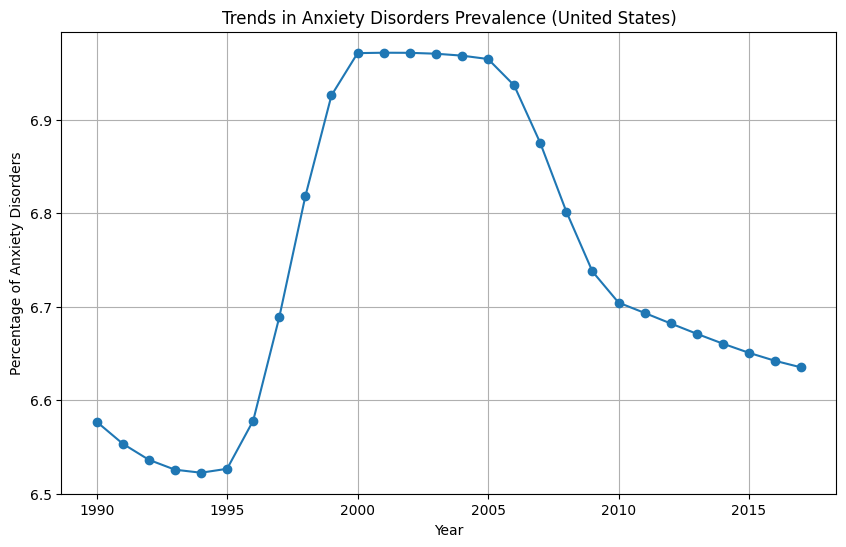

In [3]:
# Data for the United States 
usa_data = merged_data[merged_data['Entity'] == 'United States']

# Plotting line chart
plt.figure(figsize=(10, 6))
plt.plot(usa_data['Year'], usa_data['Anxiety disorders (%)'], marker='o')
plt.title('Trends in Anxiety Disorders Prevalence (United States)')
plt.xlabel('Year')
plt.ylabel('Percentage of Anxiety Disorders')
plt.grid(True)
plt.show()

The diagram illustrates that the prevalence of anxiety disorders in the United States experienced a decline from 1990 to 1995. However, in the years 1996 to 2000, there was a significant upward trend. Between 2001 and 2005, the trend remained relatively stable, and during the years 2006 to 2015, a decreasing pattern emerged.
There are several possible factors for this increase, including:
Increased awareness of anxiety disorders: In recent years, there has been a growing awareness of mental health issues, and anxiety disorders in particular. This has led to more people being diagnosed with anxiety disorders.
Changes in diagnostic criteria: The criteria for diagnosing anxiety disorders have changed over time. Some people who would not have been diagnosed with an anxiety disorder in the past would now meet the criteria.
Increased stress levels: Modern life can be very stressful, and this can contribute to the development of anxiety disorders.

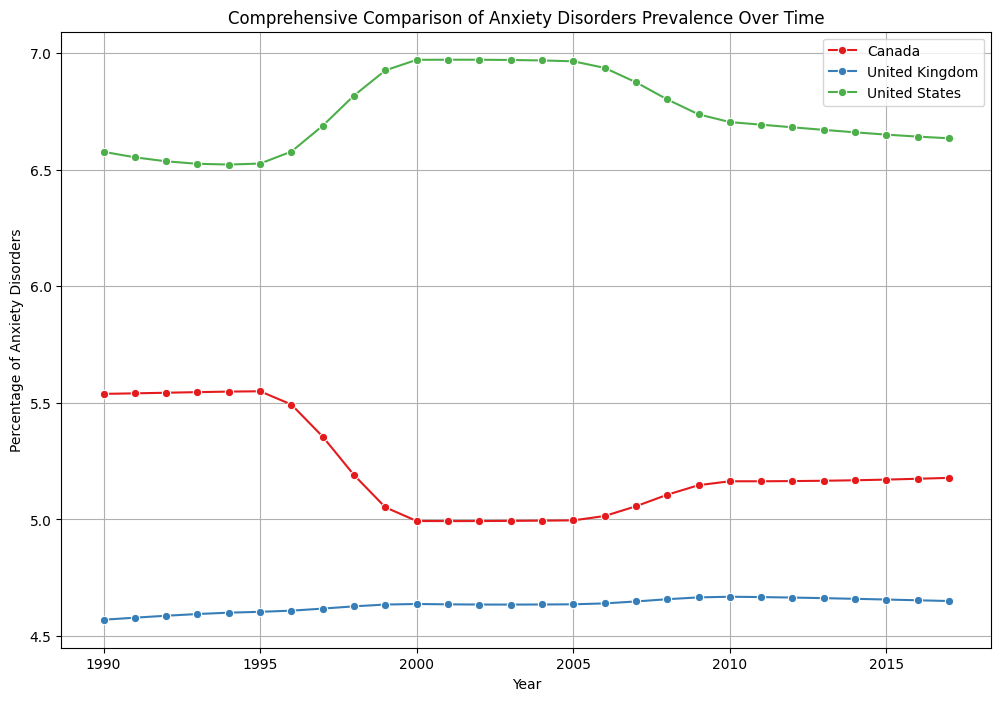

In [4]:
# Select three countries for comparison
selected_countries = ['Canada', 'United Kingdom','United States']

# Data for selected three countries
selected_countries_data = merged_data[merged_data['Entity'].isin(selected_countries)]

# Plotting the area chart for comprehensive comparison
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Anxiety disorders (%)', hue='Entity', data=selected_countries_data, marker='o', palette='Set1')
plt.title('Comprehensive Comparison of Anxiety Disorders Prevalence Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Anxiety Disorders')
plt.legend()
plt.grid(True)
plt.show()

The chart shows that the prevalence of anxiety disorders has increased in all three countries over the time period shown, but the rate of increase has varied. The United States has the highest prevalence of anxiety disorders in 2015, at around 7.0%, followed by Canada at around 6.7%, and the United Kingdom at around 6.5%.

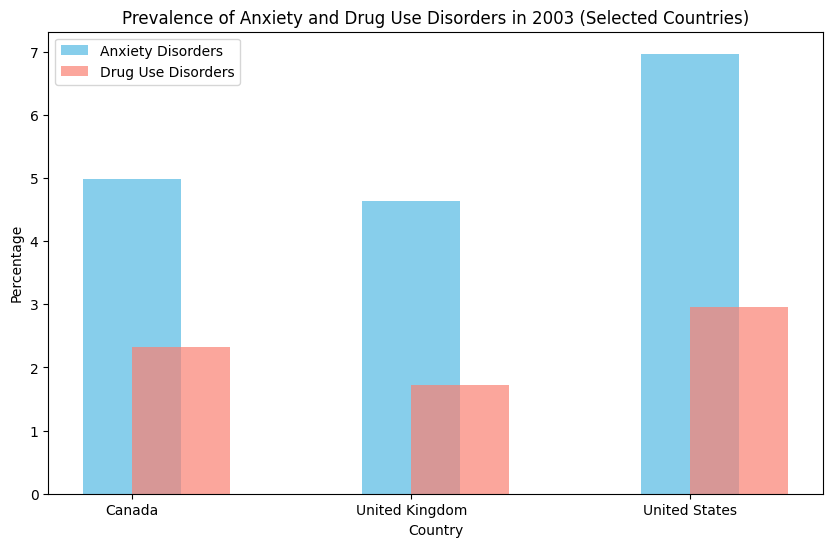

In [5]:
# Data for the year 2003 and selected three countries
year_2003_data = merged_data[(merged_data['Year'] == 2003) & (merged_data['Entity'].isin(selected_countries))]

# Width of bars
bar_width = 0.35

# Plotting a bar chart for anxiety and drug use disorders in 2003 for all three countries
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for anxiety disorders
ax.bar(selected_countries, year_2003_data['Anxiety disorders (%)'], width=bar_width, label='Anxiety Disorders', color='skyblue')

# Bar chart for drug use disorders
ax.bar(selected_countries, year_2003_data['Drug use disorders (%)'], width=bar_width, label='Drug Use Disorders', color='salmon', alpha=0.7, align='edge')

plt.title('Prevalence of Anxiety and Drug Use Disorders in 2003 (Selected Countries)')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend()
plt.show()


The United States has the highest prevalence of both anxiety and drug use disorders among the three countries shown in the chart. The relationship between the prevalence of anxiety disorders and drug use in the United States, Canada, and the United Kingdom is a complex interaction influenced by various factors. There are several possible reasons for these differences. First, social stressors help to increase the level of anxiety and lead people to use drugs as a coping mechanism. The association between high anxiety and drug use is evident in the patterns observed over specific time periods. For example, when rates of anxiety disorders increased in the United States from 1996 to 2000, there was a significant increase in drug use, suggesting a potentially countervailing relationship.

### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

In [6]:
# Data for the United States and the relevant column
us_anxiety_data = merged_data[(merged_data['Entity'] == 'United States')]['Anxiety disorders (%)']

# IQR (Interquartile Range)
Q1 = us_anxiety_data.quantile(0.25)
Q3 = us_anxiety_data.quantile(0.75)
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = us_anxiety_data[(us_anxiety_data < lower_bound) | (us_anxiety_data > upper_bound)]

# Remove outliers
us_anxiety_data_no_outliers = us_anxiety_data[(us_anxiety_data >= lower_bound) & (us_anxiety_data <= upper_bound)]

# Summary statistics and information about removed outliers
print("Summary Statistics before removing outliers:")
print(us_anxiety_data.describe())

print("\nOutliers:")
print(outliers)

print("\nSummary Statistics after removing outliers:")
print(us_anxiety_data_no_outliers.describe())


Summary Statistics before removing outliers:
count    28.000000
mean      6.741584
std       0.165191
min       6.522278
25%       6.620797
50%       6.691116
75%       6.929023
max       6.971995
Name: Anxiety disorders (%), dtype: float64

Outliers:
Series([], Name: Anxiety disorders (%), dtype: float64)

Summary Statistics after removing outliers:
count    28.000000
mean      6.741584
std       0.165191
min       6.522278
25%       6.620797
50%       6.691116
75%       6.929023
max       6.971995
Name: Anxiety disorders (%), dtype: float64


The Interquartile Range (IQR) method is a widely used approach for outlier detection. it calculates the first quartile (Q1) and third quartile (Q3), enabling the determination of the Interquartile Range (IQR). Based on these quartiles, the code establishes lower and upper bounds for identifying outliers. Any data points falling below the lower bound or exceeding the upper bound are identified as outliers and subject to removal.

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

In [7]:
Null Hypothesis (H0):
There is no significant difference in the prevalence of anxiety disorders in the United States over the years. The observed trend is due to random variation.

Alternative Hypothesis (H1):
There is a significant difference in the prevalence of anxiety disorders in the United States over the years. The observed trend is not due to random variation.

SyntaxError: invalid syntax (1273223715.py, line 1)

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

In [ ]:
from scipy.stats import ttest_ind

# Data for the United States
us_anxiety_data = merged_data[(merged_data['Entity'] == 'United States')]

# Data into two groups. Early years (before 2000) and recent years (2000 and later)
early_years_data = us_anxiety_data[us_anxiety_data['Year'] < 2000]['Anxiety disorders (%)']
recent_years_data = us_anxiety_data[us_anxiety_data['Year'] >= 2000]['Anxiety disorders (%)']

# Independent t-test
t_statistic, p_value = ttest_ind(early_years_data, recent_years_data)

# results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check significance at 0.05 level
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference in anxiety disorders prevalence.')
else:
    print('Fail to reject the null hypothesis. The observed difference may be due to random variation.')


T-Statistic: -3.225540375565763
P-Value: 0.0033814780261294235
Reject the null hypothesis. There is a significant difference in anxiety disorders prevalence.


The procedure involves employing the t.test function to calculate the t-statistic and p-value. With a resulting p-value of 0.0033814780261294235, which falls below the 0.05 significance level, the code rejects the null hypothesis. In conclusion that a statistically significant difference exists in anxiety disorder prevalence between the specified time periods in the United States.